In [1]:
"""


Inside this notebook we are going to do hyperparameter tunning for each kernels.

So, here are the workflow for this notebook:

INPUT:
=> scaled training set .csv
=> pickle file of selected features

OUTPUT:
=> best estimator for each kernel
=> best parametes for each kernel
=> result will be saved in pickle file


"""

'\n\n\nInside this notebook we are going to do hyperparameter tunning for each kernels.\n\nSo, here are the workflow for this notebook:\n\nINPUT:\n=> training set .csv\n=> pickle file of selected features\n=> scaler\n\n\nOUTPUT:\n=> best estimator for each kernel\n=> best parametes for each kernel\n=> result will be saved in pickle file\n\n\n'

In [2]:
import pandas as pd
import numpy as np
import joblib
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_val_score, KFold

# Load Training Set

In [3]:
### Load Train set
X_train = pd.read_csv('D:\Coding\Machine Learning\Bioinformatics\QSAR study on falcipain inhibitor\Dataset Falcipain/x_train_scaled.csv')
y_train = pd.read_csv('D:\Coding\Machine Learning\Bioinformatics\QSAR study on falcipain inhibitor\Dataset Falcipain/y_train.csv')

In [4]:
X_train

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,-0.175055,-0.667307,0.060116,0.023334,0.619897,0.913049,0.784631,0.545121,1.220854,0.031516,...,0.238029,1.266837,0.516444,1.524384,1.479466,0.729893,0.899578,1.379152,-0.037628,1.330254
1,-0.175055,0.303730,-0.709409,-0.922499,-0.725249,0.718139,0.784631,-0.794791,-0.692572,-0.822722,...,1.003432,-0.700491,-0.127382,-0.028198,-0.899455,0.628256,-0.708953,-0.844105,-0.301112,-0.723821
2,-0.175055,-0.625575,0.004245,0.153468,0.116153,-0.256411,-0.301376,0.081305,0.024963,0.116939,...,-0.098506,-0.018287,-0.648925,0.382621,0.393514,-0.597750,-0.178829,0.031723,-0.271793,0.023115
3,-0.175055,-0.764727,0.198508,-1.282429,-0.298925,1.692690,1.689636,-0.382510,-0.094626,-0.566450,...,0.066954,-0.050616,0.696433,-0.951631,-0.024352,-0.642836,-0.321327,0.166466,0.213671,-0.023568
4,-0.175055,0.343092,-0.717223,0.443405,-0.234618,-1.425871,-1.387382,-0.073300,-0.572983,0.287787,...,-1.092884,-0.647095,-1.319520,-0.890682,-0.892313,-0.039503,-0.663559,-0.776734,0.026719,-0.723821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-0.175055,-1.547112,1.714596,0.952525,1.715156,0.913049,0.784631,1.678892,1.579621,1.654566,...,-1.036232,1.517698,-0.673684,0.752989,0.487391,0.576197,1.774303,0.570695,2.354662,1.190203
202,-0.175055,0.233495,-0.690942,0.345670,0.732018,0.913049,0.784631,0.545121,1.460032,-0.139332,...,1.525145,1.484353,0.253274,2.231758,1.478996,0.728487,1.196416,1.783381,0.112009,1.610355
203,-0.175055,0.189656,-0.676476,-1.335788,-1.277767,-0.256411,-0.301376,-1.207071,-1.170928,-1.164417,...,0.500197,-1.156895,0.350115,-1.257280,0.082625,-1.229831,-1.009344,-0.978848,-0.258086,-1.143973
204,-0.175055,0.741196,-0.693869,0.607228,1.509540,1.302870,1.508635,1.472752,1.579621,1.312871,...,-0.991905,1.688615,1.149305,0.744682,-0.091899,1.981316,1.845355,1.985495,1.433613,1.843773


In [5]:
y_train

,FP-2 pIC50 (uM)
0,4.786748
1,5.236572
2,6.853872
3,5.337242
4,4.314258
...,...
201,6.920819
202,4.717831
203,4.292430
204,5.283997


# Load Features Selection Results via Pickle

In [6]:
### Load selected features from pickel
selected_features_statistical = joblib.load('Dataset Falcipain\selected_features_statistical.pkl')
selected_features_GA = joblib.load('Dataset Falcipain\selected_features_GA_df.pkl')

**Here are the best selected features for statistical features selection**

In [7]:
selected_features_statistical

array(['ALogP', 'ALogp2', 'AMR', 'apol', 'naAromAtom', 'nAromBond',
       'nAtom', 'nHeavyAtom', 'nH', 'nC', 'nN', 'nO', 'nS', 'nX', 'ATS0m',
       'ATS1m', 'ATS2m', 'ATS3m', 'ATS4m', 'ATS5m', 'ATS6m', 'ATS7m',
       'ATS8m', 'ATS0v', 'ATS1v', 'ATS2v', 'ATS3v', 'ATS4v', 'ATS5v',
       'ATS6v', 'ATS7v', 'ATS8v', 'ATS0e', 'ATS1e', 'ATS2e', 'ATS3e',
       'ATS4e', 'ATS5e', 'ATS6e', 'ATS7e', 'ATS8e', 'ATS0p', 'ATS1p',
       'ATS2p', 'ATS3p', 'ATS4p', 'ATS5p', 'ATS6p', 'ATS7p', 'ATS8p',
       'ATS0i', 'ATS1i', 'ATS2i', 'ATS3i', 'ATS4i', 'ATS5i', 'ATS6i',
       'ATS7i', 'ATS8i', 'ATS0s', 'ATS1s', 'ATS2s', 'ATS3s', 'ATS4s',
       'ATS5s', 'ATS6s', 'ATS7s', 'ATS8s', 'AATS0m', 'AATS1m', 'AATS2m',
       'AATS3m', 'AATS4m', 'AATS5m', 'AATS6m', 'AATS7m', 'AATS8m',
       'AATS0v', 'AATS1v', 'AATS2v', 'AATS3v', 'AATS4v', 'AATS5v',
       'AATS6v', 'AATS7v', 'AATS8v', 'AATS0i', 'AATS1i', 'AATS2i',
       'AATS3i', 'AATS4i', 'AATS5i', 'AATS6i', 'AATS7i', 'AATS8i',
       'AATS0s', 'AATS2s',

**For genetic features selection we devided the results for each SVR Kernel**

In [34]:
"""
Selected features GA are devided for each SVR kernel

index
0: linear kernel
1: rbf kernel
2: poly kernel


Each kernel should has 20 different results from 20 different runtimes


"""
solutions_linear_df = selected_features_GA[0]
solutions_rbf_df = selected_features_GA[1]
solutions_poly_df = selected_features_GA[2]

# Slice Feature Based on Features Selection Result

**Statistical FS --> Genetic FS**

In [10]:
### Statistical FS

X_train = X_train[selected_features_statistical]
X_train

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,MW,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,-0.667307,0.060116,0.023334,0.619897,0.913049,0.784631,0.545121,1.220854,0.031516,0.917177,...,1.040934,0.238029,1.266837,1.524384,1.479466,0.729893,0.899578,1.379152,-0.037628,1.330254
1,0.303730,-0.709409,-0.922499,-0.725249,0.718139,0.784631,-0.794791,-0.692572,-0.822722,-0.832253,...,-0.571242,1.003432,-0.700491,-0.028198,-0.899455,0.628256,-0.708953,-0.844105,-0.301112,-0.723821
2,-0.625575,0.004245,0.153468,0.116153,-0.256411,-0.301376,0.081305,0.024963,0.116939,-0.103324,...,0.191644,-0.098506,-0.018287,0.382621,0.393514,-0.597750,-0.178829,0.031723,-0.271793,0.023115
3,-0.764727,0.198508,-1.282429,-0.298925,1.692690,1.689636,-0.382510,-0.094626,-0.566450,0.188248,...,-0.362769,0.066954,-0.050616,-0.951631,-0.024352,-0.642836,-0.321327,0.166466,0.213671,-0.023568
4,0.343092,-0.717223,0.443405,-0.234618,-1.425871,-1.387382,-0.073300,-0.572983,0.287787,-0.394895,...,-0.544159,-1.092884,-0.647095,-0.890682,-0.892313,-0.039503,-0.663559,-0.776734,0.026719,-0.723821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1.547112,1.714596,0.952525,1.715156,0.913049,0.784631,1.678892,1.579621,1.654566,1.646105,...,1.561830,-1.036232,1.517698,0.752989,0.487391,0.576197,1.774303,0.570695,2.354662,1.190203
202,0.233495,-0.690942,0.345670,0.732018,0.913049,0.784631,0.545121,1.460032,-0.139332,0.917177,...,1.871675,1.525145,1.484353,2.231758,1.478996,0.728487,1.196416,1.783381,0.112009,1.610355
203,0.189656,-0.676476,-1.335788,-1.277767,-0.256411,-0.301376,-1.207071,-1.170928,-1.164417,-0.978039,...,-1.376780,0.500197,-1.156895,-1.257280,0.082625,-1.229831,-1.009344,-0.978848,-0.258086,-1.143973
204,0.741196,-0.693869,0.607228,1.509540,1.302870,1.508635,1.472752,1.579621,1.312871,1.646105,...,1.353999,-0.991905,1.688615,0.744682,-0.091899,1.981316,1.845355,1.985495,1.433613,1.843773


**For experiment purpose, features slicing with GA FS result will be done for each different kernel**

In [11]:
### Linear Kernel GA FS result
X_train_linear = X_train[solutions_linear_df.sort_values(by='objective_scores', ascending=False, ignore_index=True)['selected_features'][0]]

### rbf Kernel GA FS result
X_train_rbf = X_train[solutions_rbf_df.sort_values(by='objective_scores', ascending=False, ignore_index=True)['selected_features'][0]]

### poly Kernel GA FS result
X_train_poly = X_train[solutions_poly_df.sort_values(by='objective_scores', ascending=False, ignore_index=True)['selected_features'][0]]

In [12]:
# Data dimensions after features selection

print(f'Linear Train Shape: {X_train_linear.shape}')
print(f'Rbf Train Shape: {X_train_rbf.shape}')
print(f'Poly Train Shape: {X_train_poly.shape}')

Linear Train Shape: (206, 256)
Rbf Train Shape: (206, 245)
Poly Train Shape: (206, 262)


# Hyperparameters Tuning 

In this section we will perform hyperparameter tuning with cross-validation method

hyperparameter tuning will be done for each SVR kernel, but firstly let's build a benchmark models using default parameters

## Benchmark Model with default parameters and cross-validation

### Linear Model Benchmark Before Tuning

In [13]:
### Prepare K fold split for crossvalidation
# kfold = KFold(n_splits=10, random_state=12, shuffle=True)

### create model
model_linear = SVR(kernel='linear')

### cross-validation evaluation
scores_linear_ = cross_val_score(model_linear, X_train_linear, y_train.values.ravel(), scoring='r2', cv=10, n_jobs=-1)

### Show CV result
print(f'R2 Score: {scores_linear_.mean()} {scores_linear_.std()}')

R2 Score: 0.5710128688313688 0.2122913953116682


In [14]:
scores_linear_

array([0.91809725, 0.29383928, 0.8403861 , 0.71258306, 0.23768219,
       0.6486529 , 0.56240086, 0.3885615 , 0.48432751, 0.62359804])

### RBF Model Benchmark Before Tuning

In [15]:
### Prepare K fold split for crossvalidation
# kfold = KFold(n_splits=10, random_state=46, shuffle=True)

### create model
model_rbf = SVR(kernel='rbf')

### cross-validation evaluation
scores_rbf_ = cross_val_score(model_rbf, X_train_rbf, y_train.values.ravel(), scoring='r2', cv=10, n_jobs=-1)

### Show CV result
print(f'R2 Score: {scores_rbf_.mean()} {scores_rbf_.std()}')

R2 Score: 0.6760065832629036 0.21222963153129135


In [16]:
scores_rbf_

array([0.88249408, 0.17481106, 0.7786089 , 0.65405646, 0.54116709,
       0.52130018, 0.63207484, 0.85406868, 0.8887125 , 0.83277203])

### Poly Model Benchmark Before Tuning

In [17]:
### Prepare K fold split for crossvalidation
# kfold = KFold(n_splits=10, random_state=46, shuffle=True)

### create model
model_poly = SVR(kernel='poly')

### cross-validation evaluation
scores_poly_ = cross_val_score(model_poly, X_train_poly, y_train.values.ravel(), scoring='r2', cv=10, n_jobs=-1)

### Show CV result
print(f'R2 Score: {scores_poly_.mean()} {scores_poly_.std()}')

R2 Score: 0.5427190337029417 0.1925043839056811


In [18]:
scores_poly_

array([0.67116941, 0.28802848, 0.65382247, 0.3381288 , 0.6250243 ,
       0.70022603, 0.20838029, 0.62494749, 0.82897715, 0.48848592])

## Tuning Parameters with grid search

In [19]:
from sklearn.model_selection import GridSearchCV

### Linear Model After Tuning

In [20]:
parameters = {'kernel':['linear'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'epsilon':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'degree':[1, 2, 3, 4, 5, 6],
              'gamma' :['auto','scale']
             }

model = SVR()
grid = GridSearchCV(model, parameters, scoring='r2', refit=True, verbose=2)


grid.fit(X_train_linear, y_train.values.ravel())

# print best parameter after tuning
best_params_linear = grid.best_params_
print(best_params_linear)

# print how our model looks after hyper-parameter tuning
best_estimator_linear = grid.best_estimator_
print(best_estimator_linear)

Fitting 5 folds for each of 588 candidates, totalling 2940 fits
[CV] END C=0.001, degree=1, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=1, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=1, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=1, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=1, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=1, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=1, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=1, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=1, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=1, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=1, epsilon=0.01,

[CV] END C=0.001, degree=2, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=2, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=2, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=2, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=2, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=2, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=2, epsilon=1, gamma=sca

[CV] END C=0.001, degree=3, epsilon=100, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=3, epsilon=100, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=3, epsilon=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=3, epsilon=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=3, epsilon=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=3, epsilon=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=3, epsilon=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=3, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=3, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=3, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=3, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=3, epsilo

[CV] END C=0.001, degree=5, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=5, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=5, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=5, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=5, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=5, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=5, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=5, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=5, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=5, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=5, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=5, e

[CV] END C=0.001, degree=6, epsilon=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=6, epsilon=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=6, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=6, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=6, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=6, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=6, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=6, epsilon=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=6, epsilon=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=6, epsilon=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=6, epsilon=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.001, degree=6, epsilon=10, gamma=scal

[CV] END C=0.01, degree=2, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=2, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=2, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=2, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=2, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=2, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=2, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=2, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=2, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=2, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=2, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=2, ep

[CV] END C=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=3, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=3, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=3, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=3, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=3, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=3, epsilon=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=3, epsilon=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=3, epsilon=1, gamma=scale, kernel=line

[CV] END C=0.01, degree=4, epsilon=100, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=4, epsilon=100, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=4, epsilon=100, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=4, epsilon=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=4, epsilon=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=4, epsilon=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=4, epsilon=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=4, epsilon=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=4, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=4, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=4, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=4, epsilon=1000, gamma

[CV] END C=0.01, degree=6, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=6, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=6, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=6, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=6, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=6, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=6, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=6, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=6, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=6, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=6, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.01, degree=6, epsilon=

[CV] END C=0.1, degree=1, epsilon=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=1, epsilon=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=1, epsilon=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=1, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=1, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=1, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=1, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=1, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=1, epsilon=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=1, epsilon=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=1, epsilon=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=1, epsilon=10, gamma=scale, kernel=linear; total t

[CV] END C=0.1, degree=3, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.01, g

[CV] END C=0.1, degree=4, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=4, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=4, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=4, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=4, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=4, epsilon=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=4, epsilon=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=4, epsilon=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=4, epsilon=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=4, epsilon=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=4, epsilon=100, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=4, epsilon=100, gamma=auto, kernel=linear; tota

[CV] END C=0.1, degree=5, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=5, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=5, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=5, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=6, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=6, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=6, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=6, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=6, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=6, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=6, epsilon=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=6, epsilon=0.001, 

[CV] END C=1, degree=1, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END C=1, degree=1, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END C=1, degree=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1, degree=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=1, degree=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=1, degree=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=1, degree=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=1, degree=1, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1, degree=1, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1, degree=1, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1, degree=1, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1, degree=1, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END 

[CV] END C=1, degree=2, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1, degree=2, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1, degree=2, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1, degree=2, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1, degree=2, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1, degree=2, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1, degree=3, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.2s
[CV] END C=1, degree=3, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.2s
[CV] END C=1, degree=3, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.1s
[CV] END C=1, degree=3, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.3s
[CV] END C=1, degree=3, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.4s
[CV] END C=1, degree=3, epsilon=0.001, gamma=scale, kernel=linear;

[CV] END C=1, degree=4, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END C=1, degree=4, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END C=1, degree=4, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1, degree=4, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=1, degree=4, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=1, degree=4, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=1, degree=4, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=1, degree=4, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1, degree=4, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1, degree=4, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1, degree=4, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1, degree=4, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END 

[CV] END C=1, degree=5, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1, degree=5, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1, degree=5, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1, degree=5, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1, degree=5, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1, degree=5, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1, degree=5, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1, degree=5, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1, degree=6, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.2s
[CV] END C=1, degree=6, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.2s
[CV] END C=1, degree=6, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.1s
[CV] END C=1, degree=6, epsilon=0.001, gamma=auto, kernel=linear; to

[CV] END C=10, degree=1, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.7s
[CV] END C=10, degree=1, epsilon=0.1, gamma=auto, kernel=linear; total time=   1.1s
[CV] END C=10, degree=1, epsilon=0.1, gamma=auto, kernel=linear; total time=   1.6s
[CV] END C=10, degree=1, epsilon=0.1, gamma=auto, kernel=linear; total time=   1.4s
[CV] END C=10, degree=1, epsilon=0.1, gamma=auto, kernel=linear; total time=   1.1s
[CV] END C=10, degree=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.7s
[CV] END C=10, degree=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   1.1s
[CV] END C=10, degree=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   1.6s
[CV] END C=10, degree=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   1.4s
[CV] END C=10, degree=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   1.1s
[CV] END C=10, degree=1, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=10, degree=1, epsilon=1, gamma=auto, kernel=linear; total time

[CV] END C=10, degree=2, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=10, degree=2, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=10, degree=2, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=10, degree=2, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=10, degree=2, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=10, degree=2, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=10, degree=2, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=10, degree=3, epsilon=0.001, gamma=auto, kernel=linear; total time=   1.9s
[CV] END C=10, degree=3, epsilon=0.001, gamma=auto, kernel=linear; total time=   2.6s
[CV] END C=10, degree=3, epsilon=0.001, gamma=auto, kernel=linear; total time=   1.0s
[CV] END C=10, degree=3, epsilon=0.001, gamma=auto, kernel=linear; total time=   1.7s
[CV] END C=10, degree=3, epsilon=0.001, gamma=auto, kern

[CV] END C=10, degree=4, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.6s
[CV] END C=10, degree=4, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.8s
[CV] END C=10, degree=4, epsilon=0.1, gamma=auto, kernel=linear; total time=   1.2s
[CV] END C=10, degree=4, epsilon=0.1, gamma=auto, kernel=linear; total time=   1.2s
[CV] END C=10, degree=4, epsilon=0.1, gamma=auto, kernel=linear; total time=   1.1s
[CV] END C=10, degree=4, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.6s
[CV] END C=10, degree=4, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.8s
[CV] END C=10, degree=4, epsilon=0.1, gamma=scale, kernel=linear; total time=   1.3s
[CV] END C=10, degree=4, epsilon=0.1, gamma=scale, kernel=linear; total time=   1.3s
[CV] END C=10, degree=4, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.9s
[CV] END C=10, degree=4, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=10, degree=4, epsilon=1, gamma=auto, kernel=linear; total time

[CV] END C=10, degree=5, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=10, degree=5, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=10, degree=5, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=10, degree=5, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=10, degree=5, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=10, degree=5, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=10, degree=5, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=10, degree=5, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=10, degree=6, epsilon=0.001, gamma=auto, kernel=linear; total time=   2.3s
[CV] END C=10, degree=6, epsilon=0.001, gamma=auto, kernel=linear; total time=   2.8s
[CV] END C=10, degree=6, epsilon=0.001, gamma=auto, kernel=linear; total time=   1.0s
[CV] END C=10, degree=6, epsilon=0.001, gamma=auto, kerne

[CV] END C=100, degree=1, epsilon=0.01, gamma=scale, kernel=linear; total time=   5.8s
[CV] END C=100, degree=1, epsilon=0.1, gamma=auto, kernel=linear; total time=   1.6s
[CV] END C=100, degree=1, epsilon=0.1, gamma=auto, kernel=linear; total time=   1.6s
[CV] END C=100, degree=1, epsilon=0.1, gamma=auto, kernel=linear; total time=   3.2s
[CV] END C=100, degree=1, epsilon=0.1, gamma=auto, kernel=linear; total time=   1.7s
[CV] END C=100, degree=1, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.9s
[CV] END C=100, degree=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   1.5s
[CV] END C=100, degree=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   1.5s
[CV] END C=100, degree=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   2.9s
[CV] END C=100, degree=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   1.4s
[CV] END C=100, degree=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.9s
[CV] END C=100, degree=1, epsilon=1, gamma=auto, kernel=li

[CV] END C=100, degree=2, epsilon=100, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=100, degree=2, epsilon=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=100, degree=2, epsilon=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=100, degree=2, epsilon=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=100, degree=2, epsilon=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=100, degree=2, epsilon=100, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=100, degree=2, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=100, degree=2, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=100, degree=2, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=100, degree=2, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=100, degree=2, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=100, degree=2, epsilon=1000, gamma=scale, ke

[CV] END C=100, degree=4, epsilon=0.01, gamma=auto, kernel=linear; total time=   5.2s
[CV] END C=100, degree=4, epsilon=0.01, gamma=auto, kernel=linear; total time=  10.7s
[CV] END C=100, degree=4, epsilon=0.01, gamma=auto, kernel=linear; total time=   5.7s
[CV] END C=100, degree=4, epsilon=0.01, gamma=auto, kernel=linear; total time=   6.9s
[CV] END C=100, degree=4, epsilon=0.01, gamma=auto, kernel=linear; total time=   5.7s
[CV] END C=100, degree=4, epsilon=0.01, gamma=scale, kernel=linear; total time=   5.6s
[CV] END C=100, degree=4, epsilon=0.01, gamma=scale, kernel=linear; total time=   9.5s
[CV] END C=100, degree=4, epsilon=0.01, gamma=scale, kernel=linear; total time=   7.1s
[CV] END C=100, degree=4, epsilon=0.01, gamma=scale, kernel=linear; total time=   5.8s
[CV] END C=100, degree=4, epsilon=0.01, gamma=scale, kernel=linear; total time=   9.5s
[CV] END C=100, degree=4, epsilon=0.1, gamma=auto, kernel=linear; total time=   2.1s
[CV] END C=100, degree=4, epsilon=0.1, gamma=auto,

[CV] END C=100, degree=5, epsilon=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=100, degree=5, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=100, degree=5, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=100, degree=5, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=100, degree=5, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=100, degree=5, epsilon=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=100, degree=5, epsilon=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=100, degree=5, epsilon=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=100, degree=5, epsilon=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=100, degree=5, epsilon=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=100, degree=5, epsilon=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=100, degree=5, epsilon=100, gamma=auto, kernel=linear; total

[CV] END C=1000, degree=1, epsilon=0.001, gamma=auto, kernel=linear; total time=  11.6s
[CV] END C=1000, degree=1, epsilon=0.001, gamma=auto, kernel=linear; total time=  10.9s
[CV] END C=1000, degree=1, epsilon=0.001, gamma=auto, kernel=linear; total time=  11.6s
[CV] END C=1000, degree=1, epsilon=0.001, gamma=auto, kernel=linear; total time=   9.0s
[CV] END C=1000, degree=1, epsilon=0.001, gamma=auto, kernel=linear; total time=   9.7s
[CV] END C=1000, degree=1, epsilon=0.001, gamma=scale, kernel=linear; total time=  10.9s
[CV] END C=1000, degree=1, epsilon=0.001, gamma=scale, kernel=linear; total time=  11.3s
[CV] END C=1000, degree=1, epsilon=0.001, gamma=scale, kernel=linear; total time=  14.3s
[CV] END C=1000, degree=1, epsilon=0.001, gamma=scale, kernel=linear; total time=  10.2s
[CV] END C=1000, degree=1, epsilon=0.001, gamma=scale, kernel=linear; total time=  10.6s
[CV] END C=1000, degree=1, epsilon=0.01, gamma=auto, kernel=linear; total time=   9.4s
[CV] END C=1000, degree=1, e

[CV] END C=1000, degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   2.2s
[CV] END C=1000, degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   3.5s
[CV] END C=1000, degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   6.5s
[CV] END C=1000, degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   4.7s
[CV] END C=1000, degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   1.6s
[CV] END C=1000, degree=2, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=2, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=2, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=2, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=2, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=2, epsilon=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=2, epsilon=1, gamma=scale, kernel=li

[CV] END C=1000, degree=3, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=3, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=3, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=4, epsilon=0.001, gamma=auto, kernel=linear; total time=  10.9s
[CV] END C=1000, degree=4, epsilon=0.001, gamma=auto, kernel=linear; total time=  10.6s
[CV] END C=1000, degree=4, epsilon=0.001, gamma=auto, kernel=linear; total time=  10.1s
[CV] END C=1000, degree=4, epsilon=0.001, gamma=auto, kernel=linear; total time=   6.7s
[CV] END C=1000, degree=4, epsilon=0.001, gamma=auto, kernel=linear; total time=   8.4s
[CV] END C=1000, degree=4, epsilon=0.001, gamma=scale, kernel=linear; total time=  10.7s
[CV] END C=1000, degree=4, epsilon=0.001, gamma=scale, kernel=linear; total time=  10.9s
[CV] END C=1000, degree=4, epsilon=0.001, gamma=scale, kernel=linear; total time=  10.0s
[CV] END C=1000, degree=4, ep

[CV] END C=1000, degree=5, epsilon=0.1, gamma=auto, kernel=linear; total time=   4.6s
[CV] END C=1000, degree=5, epsilon=0.1, gamma=auto, kernel=linear; total time=   2.2s
[CV] END C=1000, degree=5, epsilon=0.1, gamma=auto, kernel=linear; total time=   1.4s
[CV] END C=1000, degree=5, epsilon=0.1, gamma=scale, kernel=linear; total time=   2.0s
[CV] END C=1000, degree=5, epsilon=0.1, gamma=scale, kernel=linear; total time=   1.9s
[CV] END C=1000, degree=5, epsilon=0.1, gamma=scale, kernel=linear; total time=   3.4s
[CV] END C=1000, degree=5, epsilon=0.1, gamma=scale, kernel=linear; total time=   1.7s
[CV] END C=1000, degree=5, epsilon=0.1, gamma=scale, kernel=linear; total time=   1.0s
[CV] END C=1000, degree=5, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=5, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=5, epsilon=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=5, epsilon=1, gamma=auto, kerne

[CV] END C=1000, degree=6, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=6, epsilon=1000, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=6, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=6, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=6, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=6, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1000, degree=6, epsilon=1000, gamma=scale, kernel=linear; total time=   0.0s
{'C': 0.1, 'degree': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
SVR(C=0.1, degree=1, gamma='auto', kernel='linear')


In [21]:
# best_estimator_linear

### cross-validation evaluation
scores_linear_tuned = cross_val_score(best_estimator_linear, X_train_linear, y_train.values.ravel(), scoring='r2', cv=10, n_jobs=-1)

### Show CV result
print(f'R2 Score: {scores_linear_tuned.mean()} {scores_linear_tuned.std()}')

R2 Score: 0.6690184816138537 0.2261662246879934


In [22]:
### Save best estimator and params
joblib.dump(best_params_linear, 'Dataset Falcipain/best_params_linear.pkl')
joblib.dump(best_estimator_linear, 'Dataset Falcipain/best_estimator_linear.pkl')

['Dataset Falcipain/best_estimator_linear.pkl']

### RBF Model After Tuning

In [23]:
parameters = {'kernel':['rbf'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'epsilon':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'degree':[1, 2, 3, 4, 5, 6],
              'gamma' :['auto','scale']
             }

model = SVR()
grid = GridSearchCV(model, parameters, scoring='r2', refit=True, verbose=3)


grid.fit(X_train_rbf, y_train.values.ravel())

# print best parameter after tuning
best_params_rbf = grid.best_params_
print(best_params_rbf)

# print how our model looks after hyper-parameter tuning
best_estimator_rbf = grid.best_estimator_
print(best_estimator_rbf)

Fitting 5 folds for each of 588 candidates, totalling 2940 fits
[CV 1/5] END C=0.001, degree=1, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.123 total time=   0.0s
[CV 2/5] END C=0.001, degree=1, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.129 total time=   0.0s
[CV 3/5] END C=0.001, degree=1, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.114 total time=   0.0s
[CV 4/5] END C=0.001, degree=1, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.037 total time=   0.0s
[CV 5/5] END C=0.001, degree=1, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.240 total time=   0.0s
[CV 1/5] END C=0.001, degree=1, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.123 total time=   0.0s
[CV 2/5] END C=0.001, degree=1, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.129 total time=   0.0s
[CV 3/5] END C=0.001, degree=1, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.114 total time=   0.0s
[CV 4/5] END C=0.001, degree=1, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.037 total time=   0

[CV 2/5] END C=0.001, degree=2, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.127 total time=   0.0s
[CV 3/5] END C=0.001, degree=2, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.109 total time=   0.0s
[CV 4/5] END C=0.001, degree=2, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.036 total time=   0.0s
[CV 5/5] END C=0.001, degree=2, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.247 total time=   0.0s
[CV 1/5] END C=0.001, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.121 total time=   0.0s
[CV 2/5] END C=0.001, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.127 total time=   0.0s
[CV 3/5] END C=0.001, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.109 total time=   0.0s
[CV 4/5] END C=0.001, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.036 total time=   0.0s
[CV 5/5] END C=0.001, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.248 total time=   0.0s
[CV 1/5] END C=0.001, degree=2, epsilon=0.1, gamma=auto, kernel=rbf;

[CV 5/5] END C=0.001, degree=3, epsilon=0.1, gamma=auto, kernel=rbf;, score=-0.245 total time=   0.0s
[CV 1/5] END C=0.001, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-0.120 total time=   0.0s
[CV 2/5] END C=0.001, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 3/5] END C=0.001, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-0.100 total time=   0.0s
[CV 4/5] END C=0.001, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-0.038 total time=   0.0s
[CV 5/5] END C=0.001, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-0.245 total time=   0.0s
[CV 1/5] END C=0.001, degree=3, epsilon=1, gamma=auto, kernel=rbf;, score=0.002 total time=   0.0s
[CV 2/5] END C=0.001, degree=3, epsilon=1, gamma=auto, kernel=rbf;, score=0.006 total time=   0.0s
[CV 3/5] END C=0.001, degree=3, epsilon=1, gamma=auto, kernel=rbf;, score=-0.012 total time=   0.0s
[CV 4/5] END C=0.001, degree=3, epsilon=1, gamma=auto, kernel=rbf;, score=-0.035 tota

[CV 4/5] END C=0.001, degree=4, epsilon=1, gamma=scale, kernel=rbf;, score=-0.035 total time=   0.0s
[CV 5/5] END C=0.001, degree=4, epsilon=1, gamma=scale, kernel=rbf;, score=-0.010 total time=   0.0s
[CV 1/5] END C=0.001, degree=4, epsilon=10, gamma=auto, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.001, degree=4, epsilon=10, gamma=auto, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.001, degree=4, epsilon=10, gamma=auto, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.001, degree=4, epsilon=10, gamma=auto, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.001, degree=4, epsilon=10, gamma=auto, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.001, degree=4, epsilon=10, gamma=scale, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.001, degree=4, epsilon=10, gamma=scale, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.001, degree=4, epsilon=10, gamma=scale, kernel=rbf;, score=-1.710 total 

[CV 4/5] END C=0.001, degree=5, epsilon=10, gamma=scale, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.001, degree=5, epsilon=10, gamma=scale, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.001, degree=5, epsilon=100, gamma=auto, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.001, degree=5, epsilon=100, gamma=auto, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.001, degree=5, epsilon=100, gamma=auto, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.001, degree=5, epsilon=100, gamma=auto, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.001, degree=5, epsilon=100, gamma=auto, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.001, degree=5, epsilon=100, gamma=scale, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.001, degree=5, epsilon=100, gamma=scale, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.001, degree=5, epsilon=100, gamma=scale, kernel=rbf;, score=-1.

[CV 5/5] END C=0.001, degree=6, epsilon=100, gamma=scale, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.001, degree=6, epsilon=1000, gamma=auto, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.001, degree=6, epsilon=1000, gamma=auto, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.001, degree=6, epsilon=1000, gamma=auto, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.001, degree=6, epsilon=1000, gamma=auto, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.001, degree=6, epsilon=1000, gamma=auto, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.001, degree=6, epsilon=1000, gamma=scale, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.001, degree=6, epsilon=1000, gamma=scale, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.001, degree=6, epsilon=1000, gamma=scale, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.001, degree=6, epsilon=1000, gamma=scale, kernel=rbf;

[CV 2/5] END C=0.01, degree=2, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.074 total time=   0.0s
[CV 3/5] END C=0.01, degree=2, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.042 total time=   0.0s
[CV 4/5] END C=0.01, degree=2, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.020 total time=   0.0s
[CV 5/5] END C=0.01, degree=2, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.169 total time=   0.0s
[CV 1/5] END C=0.01, degree=2, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.053 total time=   0.0s
[CV 2/5] END C=0.01, degree=2, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.074 total time=   0.0s
[CV 3/5] END C=0.01, degree=2, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.042 total time=   0.0s
[CV 4/5] END C=0.01, degree=2, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.020 total time=   0.0s
[CV 5/5] END C=0.01, degree=2, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.170 total time=   0.0s
[CV 1/5] END C=0.01, degree=2, epsilon=0.01, gamma=auto, kernel=rbf;, 

[CV 3/5] END C=0.01, degree=3, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.048 total time=   0.0s
[CV 4/5] END C=0.01, degree=3, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.023 total time=   0.0s
[CV 5/5] END C=0.01, degree=3, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.171 total time=   0.0s
[CV 1/5] END C=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=rbf;, score=-0.045 total time=   0.0s
[CV 2/5] END C=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=rbf;, score=-0.067 total time=   0.0s
[CV 3/5] END C=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=rbf;, score=-0.038 total time=   0.0s
[CV 4/5] END C=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.022 total time=   0.0s
[CV 5/5] END C=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=rbf;, score=-0.163 total time=   0.0s
[CV 1/5] END C=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-0.045 total time=   0.0s
[CV 2/5] END C=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-0.067 tot

[CV 2/5] END C=0.01, degree=4, epsilon=1, gamma=auto, kernel=rbf;, score=0.061 total time=   0.0s
[CV 3/5] END C=0.01, degree=4, epsilon=1, gamma=auto, kernel=rbf;, score=0.043 total time=   0.0s
[CV 4/5] END C=0.01, degree=4, epsilon=1, gamma=auto, kernel=rbf;, score=0.022 total time=   0.0s
[CV 5/5] END C=0.01, degree=4, epsilon=1, gamma=auto, kernel=rbf;, score=0.067 total time=   0.0s
[CV 1/5] END C=0.01, degree=4, epsilon=1, gamma=scale, kernel=rbf;, score=0.053 total time=   0.0s
[CV 2/5] END C=0.01, degree=4, epsilon=1, gamma=scale, kernel=rbf;, score=0.061 total time=   0.0s
[CV 3/5] END C=0.01, degree=4, epsilon=1, gamma=scale, kernel=rbf;, score=0.044 total time=   0.0s
[CV 4/5] END C=0.01, degree=4, epsilon=1, gamma=scale, kernel=rbf;, score=0.022 total time=   0.0s
[CV 5/5] END C=0.01, degree=4, epsilon=1, gamma=scale, kernel=rbf;, score=0.065 total time=   0.0s
[CV 1/5] END C=0.01, degree=4, epsilon=10, gamma=auto, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END 

[CV 4/5] END C=0.01, degree=5, epsilon=10, gamma=auto, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.01, degree=5, epsilon=10, gamma=auto, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.01, degree=5, epsilon=10, gamma=scale, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.01, degree=5, epsilon=10, gamma=scale, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.01, degree=5, epsilon=10, gamma=scale, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.01, degree=5, epsilon=10, gamma=scale, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.01, degree=5, epsilon=10, gamma=scale, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.01, degree=5, epsilon=100, gamma=auto, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.01, degree=5, epsilon=100, gamma=auto, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.01, degree=5, epsilon=100, gamma=auto, kernel=rbf;, score=-1.710 total time=

[CV 3/5] END C=0.01, degree=6, epsilon=1000, gamma=auto, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.01, degree=6, epsilon=1000, gamma=auto, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.01, degree=6, epsilon=1000, gamma=auto, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.01, degree=6, epsilon=1000, gamma=scale, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.01, degree=6, epsilon=1000, gamma=scale, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.01, degree=6, epsilon=1000, gamma=scale, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.01, degree=6, epsilon=1000, gamma=scale, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.01, degree=6, epsilon=1000, gamma=scale, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.300 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.

[CV 5/5] END C=0.1, degree=2, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.318 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.300 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.260 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.286 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.332 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.317 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.299 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.263 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.283 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.331 total ti

[CV 5/5] END C=0.1, degree=3, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.320 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.290 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.270 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.298 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.324 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.303 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.290 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.270 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.299 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.325 total time=   0.0s
[CV 

[CV 3/5] END C=0.1, degree=4, epsilon=1, gamma=auto, kernel=rbf;, score=0.273 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, epsilon=1, gamma=auto, kernel=rbf;, score=0.228 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, epsilon=1, gamma=auto, kernel=rbf;, score=0.387 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, epsilon=1, gamma=scale, kernel=rbf;, score=0.239 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, epsilon=1, gamma=scale, kernel=rbf;, score=0.285 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, epsilon=1, gamma=scale, kernel=rbf;, score=0.273 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, epsilon=1, gamma=scale, kernel=rbf;, score=0.228 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, epsilon=1, gamma=scale, kernel=rbf;, score=0.387 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, epsilon=10, gamma=auto, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, epsilon=10, gamma=auto, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.1, d

[CV 1/5] END C=0.1, degree=5, epsilon=10, gamma=scale, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.1, degree=5, epsilon=10, gamma=scale, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.1, degree=5, epsilon=10, gamma=scale, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.1, degree=5, epsilon=10, gamma=scale, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.1, degree=5, epsilon=10, gamma=scale, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.1, degree=5, epsilon=100, gamma=auto, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.1, degree=5, epsilon=100, gamma=auto, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.1, degree=5, epsilon=100, gamma=auto, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.1, degree=5, epsilon=100, gamma=auto, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.1, degree=5, epsilon=100, gamma=auto, kernel=rbf;, score=-0.824 total time=   0.0s


[CV 2/5] END C=0.1, degree=6, epsilon=1000, gamma=scale, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.1, degree=6, epsilon=1000, gamma=scale, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.1, degree=6, epsilon=1000, gamma=scale, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.1, degree=6, epsilon=1000, gamma=scale, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=1, degree=1, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.622 total time=   0.0s
[CV 2/5] END C=1, degree=1, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, degree=1, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.537 total time=   0.0s
[CV 4/5] END C=1, degree=1, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.742 total time=   0.0s
[CV 5/5] END C=1, degree=1, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.858 total time=   0.0s
[CV 1/5] END C=1, degree=1, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.623 total time=   0.

[CV 3/5] END C=1, degree=2, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.539 total time=   0.0s
[CV 4/5] END C=1, degree=2, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.743 total time=   0.0s
[CV 5/5] END C=1, degree=2, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.857 total time=   0.0s
[CV 1/5] END C=1, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.622 total time=   0.0s
[CV 2/5] END C=1, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.705 total time=   0.0s
[CV 3/5] END C=1, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.538 total time=   0.0s
[CV 4/5] END C=1, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.743 total time=   0.0s
[CV 5/5] END C=1, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.853 total time=   0.0s
[CV 1/5] END C=1, degree=2, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.613 total time=   0.0s
[CV 2/5] END C=1, degree=2, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.706 total time=   0.0s
[CV 3/5] END C=1,

[CV 5/5] END C=1, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.849 total time=   0.0s
[CV 1/5] END C=1, degree=3, epsilon=1, gamma=auto, kernel=rbf;, score=0.430 total time=   0.0s
[CV 2/5] END C=1, degree=3, epsilon=1, gamma=auto, kernel=rbf;, score=0.580 total time=   0.0s
[CV 3/5] END C=1, degree=3, epsilon=1, gamma=auto, kernel=rbf;, score=0.444 total time=   0.0s
[CV 4/5] END C=1, degree=3, epsilon=1, gamma=auto, kernel=rbf;, score=0.477 total time=   0.0s
[CV 5/5] END C=1, degree=3, epsilon=1, gamma=auto, kernel=rbf;, score=0.724 total time=   0.0s
[CV 1/5] END C=1, degree=3, epsilon=1, gamma=scale, kernel=rbf;, score=0.429 total time=   0.0s
[CV 2/5] END C=1, degree=3, epsilon=1, gamma=scale, kernel=rbf;, score=0.578 total time=   0.0s
[CV 3/5] END C=1, degree=3, epsilon=1, gamma=scale, kernel=rbf;, score=0.446 total time=   0.0s
[CV 4/5] END C=1, degree=3, epsilon=1, gamma=scale, kernel=rbf;, score=0.477 total time=   0.0s
[CV 5/5] END C=1, degree=3, epsilon=1, gamm

[CV 4/5] END C=1, degree=4, epsilon=100, gamma=auto, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=1, degree=4, epsilon=100, gamma=auto, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=1, degree=4, epsilon=100, gamma=scale, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=1, degree=4, epsilon=100, gamma=scale, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=1, degree=4, epsilon=100, gamma=scale, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=1, degree=4, epsilon=100, gamma=scale, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=1, degree=4, epsilon=100, gamma=scale, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=1, degree=4, epsilon=1000, gamma=auto, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=1, degree=4, epsilon=1000, gamma=auto, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=1, degree=4, epsilon=1000, gamma=auto, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END

[CV 5/5] END C=1, degree=6, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.858 total time=   0.0s
[CV 1/5] END C=1, degree=6, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.623 total time=   0.0s
[CV 2/5] END C=1, degree=6, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.705 total time=   0.0s
[CV 3/5] END C=1, degree=6, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.536 total time=   0.0s
[CV 4/5] END C=1, degree=6, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.743 total time=   0.0s
[CV 5/5] END C=1, degree=6, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.854 total time=   0.0s
[CV 1/5] END C=1, degree=6, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.622 total time=   0.0s
[CV 2/5] END C=1, degree=6, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, degree=6, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.539 total time=   0.0s
[CV 4/5] END C=1, degree=6, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.743 total time=   0.0s
[CV 5/5] 

[CV 1/5] END C=10, degree=1, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.644 total time=   0.0s
[CV 2/5] END C=10, degree=1, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.843 total time=   0.0s
[CV 3/5] END C=10, degree=1, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.538 total time=   0.0s
[CV 4/5] END C=10, degree=1, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.809 total time=   0.0s
[CV 5/5] END C=10, degree=1, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.854 total time=   0.0s
[CV 1/5] END C=10, degree=1, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.644 total time=   0.0s
[CV 2/5] END C=10, degree=1, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.849 total time=   0.0s
[CV 3/5] END C=10, degree=1, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.538 total time=   0.0s
[CV 4/5] END C=10, degree=1, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.809 total time=   0.0s
[CV 5/5] END C=10, degree=1, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.853 total time=   0.0s
[CV 1/5] END C=

[CV 5/5] END C=10, degree=2, epsilon=1, gamma=auto, kernel=rbf;, score=0.767 total time=   0.0s
[CV 1/5] END C=10, degree=2, epsilon=1, gamma=scale, kernel=rbf;, score=0.456 total time=   0.0s
[CV 2/5] END C=10, degree=2, epsilon=1, gamma=scale, kernel=rbf;, score=0.680 total time=   0.0s
[CV 3/5] END C=10, degree=2, epsilon=1, gamma=scale, kernel=rbf;, score=0.431 total time=   0.0s
[CV 4/5] END C=10, degree=2, epsilon=1, gamma=scale, kernel=rbf;, score=0.545 total time=   0.0s
[CV 5/5] END C=10, degree=2, epsilon=1, gamma=scale, kernel=rbf;, score=0.760 total time=   0.0s
[CV 1/5] END C=10, degree=2, epsilon=10, gamma=auto, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=10, degree=2, epsilon=10, gamma=auto, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=10, degree=2, epsilon=10, gamma=auto, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=10, degree=2, epsilon=10, gamma=auto, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=10, degree=2

[CV 1/5] END C=10, degree=3, epsilon=100, gamma=auto, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=10, degree=3, epsilon=100, gamma=auto, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=10, degree=3, epsilon=100, gamma=auto, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=10, degree=3, epsilon=100, gamma=auto, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=10, degree=3, epsilon=100, gamma=auto, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=10, degree=3, epsilon=100, gamma=scale, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=10, degree=3, epsilon=100, gamma=scale, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=10, degree=3, epsilon=100, gamma=scale, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=10, degree=3, epsilon=100, gamma=scale, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=10, degree=3, epsilon=100, gamma=scale, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1

[CV 4/5] END C=10, degree=4, epsilon=1000, gamma=scale, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=10, degree=4, epsilon=1000, gamma=scale, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=10, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.674 total time=   0.0s
[CV 2/5] END C=10, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.848 total time=   0.0s
[CV 3/5] END C=10, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.567 total time=   0.0s
[CV 4/5] END C=10, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.803 total time=   0.0s
[CV 5/5] END C=10, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.854 total time=   0.0s
[CV 1/5] END C=10, degree=5, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.673 total time=   0.0s
[CV 2/5] END C=10, degree=5, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.853 total time=   0.0s
[CV 3/5] END C=10, degree=5, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.568 total time=   

[CV 3/5] END C=10, degree=6, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.565 total time=   0.0s
[CV 4/5] END C=10, degree=6, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.803 total time=   0.0s
[CV 5/5] END C=10, degree=6, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.854 total time=   0.0s
[CV 1/5] END C=10, degree=6, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.670 total time=   0.0s
[CV 2/5] END C=10, degree=6, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.853 total time=   0.0s
[CV 3/5] END C=10, degree=6, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.565 total time=   0.0s
[CV 4/5] END C=10, degree=6, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.803 total time=   0.0s
[CV 5/5] END C=10, degree=6, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.853 total time=   0.0s
[CV 1/5] END C=10, degree=6, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.644 total time=   0.0s
[CV 2/5] END C=10, degree=6, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.843 total time=   0.0s
[CV 3/5

[CV 3/5] END C=100, degree=1, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.522 total time=   0.0s
[CV 4/5] END C=100, degree=1, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.812 total time=   0.0s
[CV 5/5] END C=100, degree=1, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.857 total time=   0.0s
[CV 1/5] END C=100, degree=1, epsilon=1, gamma=auto, kernel=rbf;, score=0.457 total time=   0.0s
[CV 2/5] END C=100, degree=1, epsilon=1, gamma=auto, kernel=rbf;, score=0.677 total time=   0.0s
[CV 3/5] END C=100, degree=1, epsilon=1, gamma=auto, kernel=rbf;, score=0.431 total time=   0.0s
[CV 4/5] END C=100, degree=1, epsilon=1, gamma=auto, kernel=rbf;, score=0.546 total time=   0.0s
[CV 5/5] END C=100, degree=1, epsilon=1, gamma=auto, kernel=rbf;, score=0.767 total time=   0.0s
[CV 1/5] END C=100, degree=1, epsilon=1, gamma=scale, kernel=rbf;, score=0.456 total time=   0.0s
[CV 2/5] END C=100, degree=1, epsilon=1, gamma=scale, kernel=rbf;, score=0.680 total time=   0.0s
[CV 3/5] END C=100,

[CV 1/5] END C=100, degree=2, epsilon=1000, gamma=auto, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=100, degree=2, epsilon=1000, gamma=auto, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=100, degree=2, epsilon=1000, gamma=auto, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=100, degree=2, epsilon=1000, gamma=auto, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=100, degree=2, epsilon=1000, gamma=auto, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=100, degree=2, epsilon=1000, gamma=scale, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=100, degree=2, epsilon=1000, gamma=scale, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=100, degree=2, epsilon=1000, gamma=scale, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=100, degree=2, epsilon=1000, gamma=scale, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=100, degree=2, epsilon=1000, gamma=scale, kernel=rbf;, score=-0.824 tota

[CV 4/5] END C=100, degree=4, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.812 total time=   0.0s
[CV 5/5] END C=100, degree=4, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.854 total time=   0.0s
[CV 1/5] END C=100, degree=4, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.647 total time=   0.0s
[CV 2/5] END C=100, degree=4, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.822 total time=   0.0s
[CV 3/5] END C=100, degree=4, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.539 total time=   0.0s
[CV 4/5] END C=100, degree=4, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.812 total time=   0.0s
[CV 5/5] END C=100, degree=4, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.853 total time=   0.0s
[CV 1/5] END C=100, degree=4, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.647 total time=   0.0s
[CV 2/5] END C=100, degree=4, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.823 total time=   0.0s
[CV 3/5] END C=100, degree=4, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.537 total t

[CV 1/5] END C=100, degree=5, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.642 total time=   0.0s
[CV 2/5] END C=100, degree=5, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.824 total time=   0.0s
[CV 3/5] END C=100, degree=5, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.522 total time=   0.0s
[CV 4/5] END C=100, degree=5, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.812 total time=   0.0s
[CV 5/5] END C=100, degree=5, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.857 total time=   0.0s
[CV 1/5] END C=100, degree=5, epsilon=1, gamma=auto, kernel=rbf;, score=0.457 total time=   0.0s
[CV 2/5] END C=100, degree=5, epsilon=1, gamma=auto, kernel=rbf;, score=0.677 total time=   0.0s
[CV 3/5] END C=100, degree=5, epsilon=1, gamma=auto, kernel=rbf;, score=0.431 total time=   0.0s
[CV 4/5] END C=100, degree=5, epsilon=1, gamma=auto, kernel=rbf;, score=0.546 total time=   0.0s
[CV 5/5] END C=100, degree=5, epsilon=1, gamma=auto, kernel=rbf;, score=0.767 total time=   0.0s
[CV 1/5] END C=

[CV 1/5] END C=100, degree=6, epsilon=10, gamma=auto, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=100, degree=6, epsilon=10, gamma=auto, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=100, degree=6, epsilon=10, gamma=auto, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=100, degree=6, epsilon=10, gamma=auto, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=100, degree=6, epsilon=10, gamma=auto, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=100, degree=6, epsilon=10, gamma=scale, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=100, degree=6, epsilon=10, gamma=scale, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=100, degree=6, epsilon=10, gamma=scale, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=100, degree=6, epsilon=10, gamma=scale, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=100, degree=6, epsilon=10, gamma=scale, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1

[CV 3/5] END C=1000, degree=1, epsilon=100, gamma=scale, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=1000, degree=1, epsilon=100, gamma=scale, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=1000, degree=1, epsilon=100, gamma=scale, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=1000, degree=1, epsilon=1000, gamma=auto, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=1000, degree=1, epsilon=1000, gamma=auto, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=1000, degree=1, epsilon=1000, gamma=auto, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=1000, degree=1, epsilon=1000, gamma=auto, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=1000, degree=1, epsilon=1000, gamma=auto, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=1000, degree=1, epsilon=1000, gamma=scale, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=1000, degree=1, epsilon=1000, gamma=scale, kernel=rbf;, score=-0.6

[CV 1/5] END C=1000, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.647 total time=   0.0s
[CV 2/5] END C=1000, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.822 total time=   0.0s
[CV 3/5] END C=1000, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.539 total time=   0.0s
[CV 4/5] END C=1000, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.812 total time=   0.0s
[CV 5/5] END C=1000, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.853 total time=   0.0s
[CV 1/5] END C=1000, degree=3, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.647 total time=   0.0s
[CV 2/5] END C=1000, degree=3, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.823 total time=   0.0s
[CV 3/5] END C=1000, degree=3, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.537 total time=   0.0s
[CV 4/5] END C=1000, degree=3, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.812 total time=   0.0s
[CV 5/5] END C=1000, degree=3, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.855

[CV 3/5] END C=1000, degree=4, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.538 total time=   0.0s
[CV 4/5] END C=1000, degree=4, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.812 total time=   0.0s
[CV 5/5] END C=1000, degree=4, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.854 total time=   0.0s
[CV 1/5] END C=1000, degree=4, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.642 total time=   0.0s
[CV 2/5] END C=1000, degree=4, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.824 total time=   0.0s
[CV 3/5] END C=1000, degree=4, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.523 total time=   0.0s
[CV 4/5] END C=1000, degree=4, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.812 total time=   0.0s
[CV 5/5] END C=1000, degree=4, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.858 total time=   0.0s
[CV 1/5] END C=1000, degree=4, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.642 total time=   0.0s
[CV 2/5] END C=1000, degree=4, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.824 total time=

[CV 1/5] END C=1000, degree=5, epsilon=1, gamma=auto, kernel=rbf;, score=0.457 total time=   0.0s
[CV 2/5] END C=1000, degree=5, epsilon=1, gamma=auto, kernel=rbf;, score=0.677 total time=   0.0s
[CV 3/5] END C=1000, degree=5, epsilon=1, gamma=auto, kernel=rbf;, score=0.431 total time=   0.0s
[CV 4/5] END C=1000, degree=5, epsilon=1, gamma=auto, kernel=rbf;, score=0.546 total time=   0.0s
[CV 5/5] END C=1000, degree=5, epsilon=1, gamma=auto, kernel=rbf;, score=0.767 total time=   0.0s
[CV 1/5] END C=1000, degree=5, epsilon=1, gamma=scale, kernel=rbf;, score=0.456 total time=   0.0s
[CV 2/5] END C=1000, degree=5, epsilon=1, gamma=scale, kernel=rbf;, score=0.680 total time=   0.0s
[CV 3/5] END C=1000, degree=5, epsilon=1, gamma=scale, kernel=rbf;, score=0.431 total time=   0.0s
[CV 4/5] END C=1000, degree=5, epsilon=1, gamma=scale, kernel=rbf;, score=0.545 total time=   0.0s
[CV 5/5] END C=1000, degree=5, epsilon=1, gamma=scale, kernel=rbf;, score=0.760 total time=   0.0s
[CV 1/5] END C=

[CV 3/5] END C=1000, degree=6, epsilon=10, gamma=scale, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=1000, degree=6, epsilon=10, gamma=scale, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=1000, degree=6, epsilon=10, gamma=scale, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=1000, degree=6, epsilon=100, gamma=auto, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=1000, degree=6, epsilon=100, gamma=auto, kernel=rbf;, score=-0.688 total time=   0.0s
[CV 3/5] END C=1000, degree=6, epsilon=100, gamma=auto, kernel=rbf;, score=-1.710 total time=   0.0s
[CV 4/5] END C=1000, degree=6, epsilon=100, gamma=auto, kernel=rbf;, score=-1.594 total time=   0.0s
[CV 5/5] END C=1000, degree=6, epsilon=100, gamma=auto, kernel=rbf;, score=-0.824 total time=   0.0s
[CV 1/5] END C=1000, degree=6, epsilon=100, gamma=scale, kernel=rbf;, score=-0.679 total time=   0.0s
[CV 2/5] END C=1000, degree=6, epsilon=100, gamma=scale, kernel=rbf;, score=-0.688 total t

In [24]:
### cross-validation evaluation
scores_rbf_tuned = cross_val_score(best_estimator_rbf, X_train_rbf, y_train.values.ravel(), scoring='r2', cv=10, n_jobs=-1)

### Show CV result
print(f'R2 Score: {scores_rbf_tuned.mean()} {scores_rbf_tuned.std()}')

R2 Score: 0.7278016591371522 0.20020611282033782


In [25]:
### Save best estimator and params
joblib.dump(best_params_rbf, 'Dataset Falcipain/best_params_rbf.pkl')
joblib.dump(best_estimator_rbf, 'Dataset Falcipain/best_estimator_rbf.pkl')

['Dataset Falcipain/best_estimator_rbf.pkl']

### Poly Model After Tuning

In [26]:
parameters = {'kernel':['poly'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'epsilon':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'degree':[1, 2, 3, 4, 5, 6],
              'gamma' :['auto','scale']
             }

model = SVR()
grid = GridSearchCV(model, parameters, scoring='r2', refit=True, verbose=3)


grid.fit(X_train_poly, y_train.values.ravel())

# print best parameter after tuning
best_params_poly = grid.best_params_
print(best_params_poly)

# print how our model looks after hyper-parameter tuning
best_estimator_poly = grid.best_estimator_
print(best_estimator_poly)

Fitting 5 folds for each of 588 candidates, totalling 2940 fits
[CV 1/5] END C=0.001, degree=1, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.106 total time=   0.0s
[CV 2/5] END C=0.001, degree=1, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.116 total time=   0.0s
[CV 3/5] END C=0.001, degree=1, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.076 total time=   0.0s
[CV 4/5] END C=0.001, degree=1, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.027 total time=   0.0s
[CV 5/5] END C=0.001, degree=1, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.222 total time=   0.0s
[CV 1/5] END C=0.001, degree=1, epsilon=0.001, gamma=scale, kernel=poly;, score=-0.106 total time=   0.0s
[CV 2/5] END C=0.001, degree=1, epsilon=0.001, gamma=scale, kernel=poly;, score=-0.117 total time=   0.0s
[CV 3/5] END C=0.001, degree=1, epsilon=0.001, gamma=scale, kernel=poly;, score=-0.076 total time=   0.0s
[CV 4/5] END C=0.001, degree=1, epsilon=0.001, gamma=scale, kernel=poly;, score=-0.027 total 

[CV 4/5] END C=0.001, degree=2, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.039 total time=   0.0s
[CV 5/5] END C=0.001, degree=2, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.239 total time=   0.0s
[CV 1/5] END C=0.001, degree=2, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.120 total time=   0.0s
[CV 2/5] END C=0.001, degree=2, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.132 total time=   0.0s
[CV 3/5] END C=0.001, degree=2, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.100 total time=   0.0s
[CV 4/5] END C=0.001, degree=2, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.039 total time=   0.0s
[CV 5/5] END C=0.001, degree=2, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.238 total time=   0.0s
[CV 1/5] END C=0.001, degree=2, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.126 total time=   0.0s
[CV 2/5] END C=0.001, degree=2, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.128 total time=   0.0s
[CV 3/5] END C=0.001, degree=2, epsilon=0.1, gamma=auto, kern

[CV 1/5] END C=0.001, degree=3, epsilon=1, gamma=auto, kernel=poly;, score=0.008 total time=   0.0s
[CV 2/5] END C=0.001, degree=3, epsilon=1, gamma=auto, kernel=poly;, score=0.010 total time=   0.0s
[CV 3/5] END C=0.001, degree=3, epsilon=1, gamma=auto, kernel=poly;, score=0.004 total time=   0.0s
[CV 4/5] END C=0.001, degree=3, epsilon=1, gamma=auto, kernel=poly;, score=-0.032 total time=   0.0s
[CV 5/5] END C=0.001, degree=3, epsilon=1, gamma=auto, kernel=poly;, score=0.005 total time=   0.0s
[CV 1/5] END C=0.001, degree=3, epsilon=1, gamma=scale, kernel=poly;, score=0.009 total time=   0.0s
[CV 2/5] END C=0.001, degree=3, epsilon=1, gamma=scale, kernel=poly;, score=0.009 total time=   0.0s
[CV 3/5] END C=0.001, degree=3, epsilon=1, gamma=scale, kernel=poly;, score=0.003 total time=   0.0s
[CV 4/5] END C=0.001, degree=3, epsilon=1, gamma=scale, kernel=poly;, score=-0.032 total time=   0.0s
[CV 5/5] END C=0.001, degree=3, epsilon=1, gamma=scale, kernel=poly;, score=0.009 total time= 

[CV 5/5] END C=0.001, degree=4, epsilon=10, gamma=auto, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.001, degree=4, epsilon=10, gamma=scale, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.001, degree=4, epsilon=10, gamma=scale, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.001, degree=4, epsilon=10, gamma=scale, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.001, degree=4, epsilon=10, gamma=scale, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.001, degree=4, epsilon=10, gamma=scale, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.001, degree=4, epsilon=100, gamma=auto, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.001, degree=4, epsilon=100, gamma=auto, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.001, degree=4, epsilon=100, gamma=auto, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.001, degree=4, epsilon=100, gamma=auto, kernel=poly;, sco

[CV 2/5] END C=0.001, degree=5, epsilon=1000, gamma=scale, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.001, degree=5, epsilon=1000, gamma=scale, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.001, degree=5, epsilon=1000, gamma=scale, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.001, degree=5, epsilon=1000, gamma=scale, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.001, degree=6, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.141 total time=   0.0s
[CV 2/5] END C=0.001, degree=6, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.126 total time=   0.0s
[CV 3/5] END C=0.001, degree=6, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.058 total time=   0.0s
[CV 4/5] END C=0.001, degree=6, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.027 total time=   0.0s
[CV 5/5] END C=0.001, degree=6, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.217 total time=   0.0s
[CV 1/5] END C=0.001, degree=6, epsilon=0.001, gamma=sc

[CV 3/5] END C=0.01, degree=1, epsilon=0.01, gamma=scale, kernel=poly;, score=0.057 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, epsilon=0.01, gamma=scale, kernel=poly;, score=0.080 total time=   0.0s
[CV 5/5] END C=0.01, degree=1, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.068 total time=   0.0s
[CV 1/5] END C=0.01, degree=1, epsilon=0.1, gamma=auto, kernel=poly;, score=0.027 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.005 total time=   0.0s
[CV 3/5] END C=0.01, degree=1, epsilon=0.1, gamma=auto, kernel=poly;, score=0.080 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, epsilon=0.1, gamma=auto, kernel=poly;, score=0.080 total time=   0.0s
[CV 5/5] END C=0.01, degree=1, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.067 total time=   0.0s
[CV 1/5] END C=0.01, degree=1, epsilon=0.1, gamma=scale, kernel=poly;, score=0.029 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, epsilon=0.1, gamma=scale, kernel=poly;, score=-0.0

[CV 5/5] END C=0.01, degree=2, epsilon=10, gamma=auto, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.01, degree=2, epsilon=10, gamma=scale, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.01, degree=2, epsilon=10, gamma=scale, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.01, degree=2, epsilon=10, gamma=scale, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.01, degree=2, epsilon=10, gamma=scale, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.01, degree=2, epsilon=10, gamma=scale, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.01, degree=2, epsilon=100, gamma=auto, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.01, degree=2, epsilon=100, gamma=auto, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.01, degree=2, epsilon=100, gamma=auto, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.01, degree=2, epsilon=100, gamma=auto, kernel=poly;, score=-1.594 

[CV 1/5] END C=0.01, degree=4, epsilon=0.001, gamma=scale, kernel=poly;, score=-0.057 total time=   0.0s
[CV 2/5] END C=0.01, degree=4, epsilon=0.001, gamma=scale, kernel=poly;, score=-0.090 total time=   0.0s
[CV 3/5] END C=0.01, degree=4, epsilon=0.001, gamma=scale, kernel=poly;, score=0.005 total time=   0.0s
[CV 4/5] END C=0.01, degree=4, epsilon=0.001, gamma=scale, kernel=poly;, score=0.017 total time=   0.0s
[CV 5/5] END C=0.01, degree=4, epsilon=0.001, gamma=scale, kernel=poly;, score=-0.072 total time=   0.0s
[CV 1/5] END C=0.01, degree=4, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.062 total time=   0.0s
[CV 2/5] END C=0.01, degree=4, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.084 total time=   0.0s
[CV 3/5] END C=0.01, degree=4, epsilon=0.01, gamma=auto, kernel=poly;, score=0.017 total time=   0.0s
[CV 4/5] END C=0.01, degree=4, epsilon=0.01, gamma=auto, kernel=poly;, score=0.021 total time=   0.0s
[CV 5/5] END C=0.01, degree=4, epsilon=0.01, gamma=auto, kernel=pol

[CV 4/5] END C=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=poly;, score=0.097 total time=   0.0s
[CV 5/5] END C=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=poly;, score=0.060 total time=   0.0s
[CV 1/5] END C=0.01, degree=5, epsilon=0.1, gamma=scale, kernel=poly;, score=-0.034 total time=   0.0s
[CV 2/5] END C=0.01, degree=5, epsilon=0.1, gamma=scale, kernel=poly;, score=-0.043 total time=   0.0s
[CV 3/5] END C=0.01, degree=5, epsilon=0.1, gamma=scale, kernel=poly;, score=0.233 total time=   0.0s
[CV 4/5] END C=0.01, degree=5, epsilon=0.1, gamma=scale, kernel=poly;, score=0.091 total time=   0.0s
[CV 5/5] END C=0.01, degree=5, epsilon=0.1, gamma=scale, kernel=poly;, score=0.116 total time=   0.0s
[CV 1/5] END C=0.01, degree=5, epsilon=1, gamma=auto, kernel=poly;, score=-0.055 total time=   0.0s
[CV 2/5] END C=0.01, degree=5, epsilon=1, gamma=auto, kernel=poly;, score=0.055 total time=   0.0s
[CV 3/5] END C=0.01, degree=5, epsilon=1, gamma=auto, kernel=poly;, score=0.209 total t

[CV 5/5] END C=0.01, degree=6, epsilon=10, gamma=auto, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.01, degree=6, epsilon=10, gamma=scale, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.01, degree=6, epsilon=10, gamma=scale, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.01, degree=6, epsilon=10, gamma=scale, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.01, degree=6, epsilon=10, gamma=scale, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.01, degree=6, epsilon=10, gamma=scale, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.01, degree=6, epsilon=100, gamma=auto, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.01, degree=6, epsilon=100, gamma=auto, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.01, degree=6, epsilon=100, gamma=auto, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.01, degree=6, epsilon=100, gamma=auto, kernel=poly;, score=-1.594 

[CV 3/5] END C=0.1, degree=1, epsilon=1000, gamma=scale, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, epsilon=1000, gamma=scale, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, epsilon=1000, gamma=scale, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, epsilon=0.001, gamma=auto, kernel=poly;, score=0.110 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, epsilon=0.001, gamma=auto, kernel=poly;, score=0.042 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, epsilon=0.001, gamma=auto, kernel=poly;, score=0.238 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, epsilon=0.001, gamma=auto, kernel=poly;, score=0.136 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, epsilon=0.001, gamma=auto, kernel=poly;, score=0.072 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, epsilon=0.001, gamma=scale, kernel=poly;, score=0.113 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, epsilon=0.001, gamma=scale, kernel=poly;, score=

[CV 4/5] END C=0.1, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=0.256 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=0.489 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=0.171 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=0.158 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=0.385 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=0.261 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=0.457 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, epsilon=0.1, gamma=scale, kernel=poly;, score=0.178 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, epsilon=0.1, gamma=scale, kernel=poly;, score=0.146 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, epsilon=0.1, gamma=scale, kernel=poly;, score=0.380 total time= 

[CV 5/5] END C=0.1, degree=4, epsilon=1, gamma=scale, kernel=poly;, score=0.374 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, epsilon=10, gamma=auto, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, epsilon=10, gamma=auto, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, epsilon=10, gamma=auto, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, epsilon=10, gamma=auto, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, epsilon=10, gamma=auto, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, epsilon=10, gamma=scale, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, epsilon=10, gamma=scale, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, epsilon=10, gamma=scale, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, epsilon=10, gamma=scale, kernel=poly;, score=-1.594 total time=   0.

[CV 3/5] END C=0.1, degree=5, epsilon=1000, gamma=auto, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.1, degree=5, epsilon=1000, gamma=auto, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.1, degree=5, epsilon=1000, gamma=auto, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.1, degree=5, epsilon=1000, gamma=scale, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=0.1, degree=5, epsilon=1000, gamma=scale, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=0.1, degree=5, epsilon=1000, gamma=scale, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=0.1, degree=5, epsilon=1000, gamma=scale, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=0.1, degree=5, epsilon=1000, gamma=scale, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=0.1, degree=6, epsilon=0.001, gamma=auto, kernel=poly;, score=0.014 total time=   0.0s
[CV 2/5] END C=0.1, degree=6, epsilon=0.001, gamma=auto, kernel=poly;, score=

[CV 4/5] END C=1, degree=1, epsilon=0.001, gamma=scale, kernel=poly;, score=0.527 total time=   0.0s
[CV 5/5] END C=1, degree=1, epsilon=0.001, gamma=scale, kernel=poly;, score=0.720 total time=   0.0s
[CV 1/5] END C=1, degree=1, epsilon=0.01, gamma=auto, kernel=poly;, score=0.453 total time=   0.0s
[CV 2/5] END C=1, degree=1, epsilon=0.01, gamma=auto, kernel=poly;, score=0.410 total time=   0.0s
[CV 3/5] END C=1, degree=1, epsilon=0.01, gamma=auto, kernel=poly;, score=0.509 total time=   0.0s
[CV 4/5] END C=1, degree=1, epsilon=0.01, gamma=auto, kernel=poly;, score=0.529 total time=   0.0s
[CV 5/5] END C=1, degree=1, epsilon=0.01, gamma=auto, kernel=poly;, score=0.720 total time=   0.0s
[CV 1/5] END C=1, degree=1, epsilon=0.01, gamma=scale, kernel=poly;, score=0.455 total time=   0.0s
[CV 2/5] END C=1, degree=1, epsilon=0.01, gamma=scale, kernel=poly;, score=0.411 total time=   0.0s
[CV 3/5] END C=1, degree=1, epsilon=0.01, gamma=scale, kernel=poly;, score=0.509 total time=   0.0s
[CV

[CV 5/5] END C=1, degree=2, epsilon=0.1, gamma=auto, kernel=poly;, score=0.642 total time=   0.0s
[CV 1/5] END C=1, degree=2, epsilon=0.1, gamma=scale, kernel=poly;, score=0.438 total time=   0.0s
[CV 2/5] END C=1, degree=2, epsilon=0.1, gamma=scale, kernel=poly;, score=0.323 total time=   0.0s
[CV 3/5] END C=1, degree=2, epsilon=0.1, gamma=scale, kernel=poly;, score=0.447 total time=   0.0s
[CV 4/5] END C=1, degree=2, epsilon=0.1, gamma=scale, kernel=poly;, score=0.491 total time=   0.0s
[CV 5/5] END C=1, degree=2, epsilon=0.1, gamma=scale, kernel=poly;, score=0.645 total time=   0.0s
[CV 1/5] END C=1, degree=2, epsilon=1, gamma=auto, kernel=poly;, score=0.402 total time=   0.0s
[CV 2/5] END C=1, degree=2, epsilon=1, gamma=auto, kernel=poly;, score=0.368 total time=   0.0s
[CV 3/5] END C=1, degree=2, epsilon=1, gamma=auto, kernel=poly;, score=0.353 total time=   0.0s
[CV 4/5] END C=1, degree=2, epsilon=1, gamma=auto, kernel=poly;, score=0.330 total time=   0.0s
[CV 5/5] END C=1, degre

[CV 4/5] END C=1, degree=3, epsilon=10, gamma=auto, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=1, degree=3, epsilon=10, gamma=auto, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=1, degree=3, epsilon=10, gamma=scale, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=1, degree=3, epsilon=10, gamma=scale, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=1, degree=3, epsilon=10, gamma=scale, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=1, degree=3, epsilon=10, gamma=scale, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=1, degree=3, epsilon=10, gamma=scale, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=1, degree=3, epsilon=100, gamma=auto, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=1, degree=3, epsilon=100, gamma=auto, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=1, degree=3, epsilon=100, gamma=auto, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END

[CV 4/5] END C=1, degree=4, epsilon=1000, gamma=scale, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=1, degree=4, epsilon=1000, gamma=scale, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=1, degree=5, epsilon=0.001, gamma=auto, kernel=poly;, score=0.347 total time=   0.0s
[CV 2/5] END C=1, degree=5, epsilon=0.001, gamma=auto, kernel=poly;, score=0.262 total time=   0.0s
[CV 3/5] END C=1, degree=5, epsilon=0.001, gamma=auto, kernel=poly;, score=0.457 total time=   0.0s
[CV 4/5] END C=1, degree=5, epsilon=0.001, gamma=auto, kernel=poly;, score=0.235 total time=   0.0s
[CV 5/5] END C=1, degree=5, epsilon=0.001, gamma=auto, kernel=poly;, score=0.379 total time=   0.0s
[CV 1/5] END C=1, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=0.349 total time=   0.0s
[CV 2/5] END C=1, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=0.223 total time=   0.0s
[CV 3/5] END C=1, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=0.458 total time=   

[CV 1/5] END C=1, degree=6, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.208 total time=   0.0s
[CV 2/5] END C=1, degree=6, epsilon=0.01, gamma=scale, kernel=poly;, score=0.225 total time=   0.0s
[CV 3/5] END C=1, degree=6, epsilon=0.01, gamma=scale, kernel=poly;, score=0.562 total time=   0.0s
[CV 4/5] END C=1, degree=6, epsilon=0.01, gamma=scale, kernel=poly;, score=0.173 total time=   0.0s
[CV 5/5] END C=1, degree=6, epsilon=0.01, gamma=scale, kernel=poly;, score=0.397 total time=   0.0s
[CV 1/5] END C=1, degree=6, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.209 total time=   0.0s
[CV 2/5] END C=1, degree=6, epsilon=0.1, gamma=auto, kernel=poly;, score=0.273 total time=   0.0s
[CV 3/5] END C=1, degree=6, epsilon=0.1, gamma=auto, kernel=poly;, score=0.544 total time=   0.0s
[CV 4/5] END C=1, degree=6, epsilon=0.1, gamma=auto, kernel=poly;, score=0.190 total time=   0.0s
[CV 5/5] END C=1, degree=6, epsilon=0.1, gamma=auto, kernel=poly;, score=0.347 total time=   0.0s
[CV 1/5]

[CV 4/5] END C=10, degree=1, epsilon=1, gamma=scale, kernel=poly;, score=0.539 total time=   0.0s
[CV 5/5] END C=10, degree=1, epsilon=1, gamma=scale, kernel=poly;, score=0.617 total time=   0.0s
[CV 1/5] END C=10, degree=1, epsilon=10, gamma=auto, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=10, degree=1, epsilon=10, gamma=auto, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=10, degree=1, epsilon=10, gamma=auto, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=10, degree=1, epsilon=10, gamma=auto, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=10, degree=1, epsilon=10, gamma=auto, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=10, degree=1, epsilon=10, gamma=scale, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=10, degree=1, epsilon=10, gamma=scale, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=10, degree=1, epsilon=10, gamma=scale, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] 

[CV 3/5] END C=10, degree=2, epsilon=100, gamma=scale, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=10, degree=2, epsilon=100, gamma=scale, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=10, degree=2, epsilon=100, gamma=scale, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=10, degree=2, epsilon=1000, gamma=auto, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=10, degree=2, epsilon=1000, gamma=auto, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=10, degree=2, epsilon=1000, gamma=auto, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=10, degree=2, epsilon=1000, gamma=auto, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=10, degree=2, epsilon=1000, gamma=auto, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=10, degree=2, epsilon=1000, gamma=scale, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=10, degree=2, epsilon=1000, gamma=scale, kernel=poly;, score=-0.688 total t

[CV 1/5] END C=10, degree=4, epsilon=0.001, gamma=scale, kernel=poly;, score=-0.020 total time=   0.0s
[CV 2/5] END C=10, degree=4, epsilon=0.001, gamma=scale, kernel=poly;, score=0.547 total time=   0.0s
[CV 3/5] END C=10, degree=4, epsilon=0.001, gamma=scale, kernel=poly;, score=-0.059 total time=   0.0s
[CV 4/5] END C=10, degree=4, epsilon=0.001, gamma=scale, kernel=poly;, score=0.535 total time=   0.0s
[CV 5/5] END C=10, degree=4, epsilon=0.001, gamma=scale, kernel=poly;, score=0.792 total time=   0.0s
[CV 1/5] END C=10, degree=4, epsilon=0.01, gamma=auto, kernel=poly;, score=0.003 total time=   0.0s
[CV 2/5] END C=10, degree=4, epsilon=0.01, gamma=auto, kernel=poly;, score=0.557 total time=   0.0s
[CV 3/5] END C=10, degree=4, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.046 total time=   0.0s
[CV 4/5] END C=10, degree=4, epsilon=0.01, gamma=auto, kernel=poly;, score=0.541 total time=   0.0s
[CV 5/5] END C=10, degree=4, epsilon=0.01, gamma=auto, kernel=poly;, score=0.792 total 

[CV 2/5] END C=10, degree=5, epsilon=0.1, gamma=auto, kernel=poly;, score=0.348 total time=   0.0s
[CV 3/5] END C=10, degree=5, epsilon=0.1, gamma=auto, kernel=poly;, score=0.455 total time=   0.0s
[CV 4/5] END C=10, degree=5, epsilon=0.1, gamma=auto, kernel=poly;, score=0.456 total time=   0.0s
[CV 5/5] END C=10, degree=5, epsilon=0.1, gamma=auto, kernel=poly;, score=0.503 total time=   0.0s
[CV 1/5] END C=10, degree=5, epsilon=0.1, gamma=scale, kernel=poly;, score=-0.011 total time=   0.0s
[CV 2/5] END C=10, degree=5, epsilon=0.1, gamma=scale, kernel=poly;, score=0.360 total time=   0.0s
[CV 3/5] END C=10, degree=5, epsilon=0.1, gamma=scale, kernel=poly;, score=0.430 total time=   0.0s
[CV 4/5] END C=10, degree=5, epsilon=0.1, gamma=scale, kernel=poly;, score=0.449 total time=   0.0s
[CV 5/5] END C=10, degree=5, epsilon=0.1, gamma=scale, kernel=poly;, score=0.542 total time=   0.0s
[CV 1/5] END C=10, degree=5, epsilon=1, gamma=auto, kernel=poly;, score=-0.501 total time=   0.0s
[CV 2

[CV 1/5] END C=10, degree=6, epsilon=1, gamma=scale, kernel=poly;, score=-1.687 total time=   0.0s
[CV 2/5] END C=10, degree=6, epsilon=1, gamma=scale, kernel=poly;, score=0.372 total time=   0.0s
[CV 3/5] END C=10, degree=6, epsilon=1, gamma=scale, kernel=poly;, score=0.338 total time=   0.0s
[CV 4/5] END C=10, degree=6, epsilon=1, gamma=scale, kernel=poly;, score=0.228 total time=   0.0s
[CV 5/5] END C=10, degree=6, epsilon=1, gamma=scale, kernel=poly;, score=0.421 total time=   0.0s
[CV 1/5] END C=10, degree=6, epsilon=10, gamma=auto, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=10, degree=6, epsilon=10, gamma=auto, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=10, degree=6, epsilon=10, gamma=auto, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=10, degree=6, epsilon=10, gamma=auto, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=10, degree=6, epsilon=10, gamma=auto, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C

[CV 2/5] END C=100, degree=1, epsilon=1000, gamma=auto, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=100, degree=1, epsilon=1000, gamma=auto, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=100, degree=1, epsilon=1000, gamma=auto, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=100, degree=1, epsilon=1000, gamma=auto, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=100, degree=1, epsilon=1000, gamma=scale, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=100, degree=1, epsilon=1000, gamma=scale, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=100, degree=1, epsilon=1000, gamma=scale, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=100, degree=1, epsilon=1000, gamma=scale, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=100, degree=1, epsilon=1000, gamma=scale, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=100, degree=2, epsilon=0.001, gamma=auto, kernel=poly;, score=

[CV 3/5] END C=100, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=0.587 total time=   0.0s
[CV 4/5] END C=100, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=0.763 total time=   0.0s
[CV 5/5] END C=100, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=0.604 total time=   0.0s
[CV 1/5] END C=100, degree=3, epsilon=0.001, gamma=scale, kernel=poly;, score=0.530 total time=   0.0s
[CV 2/5] END C=100, degree=3, epsilon=0.001, gamma=scale, kernel=poly;, score=0.714 total time=   0.0s
[CV 3/5] END C=100, degree=3, epsilon=0.001, gamma=scale, kernel=poly;, score=0.587 total time=   0.0s
[CV 4/5] END C=100, degree=3, epsilon=0.001, gamma=scale, kernel=poly;, score=0.763 total time=   0.0s
[CV 5/5] END C=100, degree=3, epsilon=0.001, gamma=scale, kernel=poly;, score=0.604 total time=   0.0s
[CV 1/5] END C=100, degree=3, epsilon=0.01, gamma=auto, kernel=poly;, score=0.531 total time=   0.0s
[CV 2/5] END C=100, degree=3, epsilon=0.01, gamma=auto, kernel=poly;, score=0.

[CV 5/5] END C=100, degree=4, epsilon=0.01, gamma=auto, kernel=poly;, score=0.682 total time=   0.0s
[CV 1/5] END C=100, degree=4, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.100 total time=   0.0s
[CV 2/5] END C=100, degree=4, epsilon=0.01, gamma=scale, kernel=poly;, score=0.677 total time=   0.0s
[CV 3/5] END C=100, degree=4, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.360 total time=   0.0s
[CV 4/5] END C=100, degree=4, epsilon=0.01, gamma=scale, kernel=poly;, score=0.681 total time=   0.0s
[CV 5/5] END C=100, degree=4, epsilon=0.01, gamma=scale, kernel=poly;, score=0.664 total time=   0.0s
[CV 1/5] END C=100, degree=4, epsilon=0.1, gamma=auto, kernel=poly;, score=0.028 total time=   0.0s
[CV 2/5] END C=100, degree=4, epsilon=0.1, gamma=auto, kernel=poly;, score=0.698 total time=   0.0s
[CV 3/5] END C=100, degree=4, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.334 total time=   0.0s
[CV 4/5] END C=100, degree=4, epsilon=0.1, gamma=auto, kernel=poly;, score=0.676 total

[CV 1/5] END C=100, degree=5, epsilon=10, gamma=auto, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=100, degree=5, epsilon=10, gamma=auto, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=100, degree=5, epsilon=10, gamma=auto, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=100, degree=5, epsilon=10, gamma=auto, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=100, degree=5, epsilon=10, gamma=auto, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=100, degree=5, epsilon=10, gamma=scale, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=100, degree=5, epsilon=10, gamma=scale, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=100, degree=5, epsilon=10, gamma=scale, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=100, degree=5, epsilon=10, gamma=scale, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=100, degree=5, epsilon=10, gamma=scale, kernel=poly;, score=-0.824 total time=   

[CV 1/5] END C=100, degree=6, epsilon=100, gamma=scale, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=100, degree=6, epsilon=100, gamma=scale, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=100, degree=6, epsilon=100, gamma=scale, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=100, degree=6, epsilon=100, gamma=scale, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=100, degree=6, epsilon=100, gamma=scale, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=100, degree=6, epsilon=1000, gamma=auto, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=100, degree=6, epsilon=1000, gamma=auto, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=100, degree=6, epsilon=1000, gamma=auto, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=100, degree=6, epsilon=1000, gamma=auto, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=100, degree=6, epsilon=1000, gamma=auto, kernel=poly;, score=-0.824

[CV 5/5] END C=1000, degree=1, epsilon=1000, gamma=scale, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=1000, degree=2, epsilon=0.001, gamma=auto, kernel=poly;, score=0.488 total time=   0.0s
[CV 2/5] END C=1000, degree=2, epsilon=0.001, gamma=auto, kernel=poly;, score=0.763 total time=   0.0s
[CV 3/5] END C=1000, degree=2, epsilon=0.001, gamma=auto, kernel=poly;, score=0.551 total time=   0.0s
[CV 4/5] END C=1000, degree=2, epsilon=0.001, gamma=auto, kernel=poly;, score=0.600 total time=   0.0s
[CV 5/5] END C=1000, degree=2, epsilon=0.001, gamma=auto, kernel=poly;, score=0.541 total time=   0.0s
[CV 1/5] END C=1000, degree=2, epsilon=0.001, gamma=scale, kernel=poly;, score=0.488 total time=   0.0s
[CV 2/5] END C=1000, degree=2, epsilon=0.001, gamma=scale, kernel=poly;, score=0.763 total time=   0.0s
[CV 3/5] END C=1000, degree=2, epsilon=0.001, gamma=scale, kernel=poly;, score=0.551 total time=   0.0s
[CV 4/5] END C=1000, degree=2, epsilon=0.001, gamma=scale, kernel=pol

[CV 4/5] END C=1000, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=0.763 total time=   0.0s
[CV 5/5] END C=1000, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=0.612 total time=   0.0s
[CV 1/5] END C=1000, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=0.541 total time=   0.0s
[CV 2/5] END C=1000, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5] END C=1000, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=0.762 total time=   0.0s
[CV 5/5] END C=1000, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=0.670 total time=   0.0s
[CV 1/5] END C=1000, degree=3, epsilon=0.1, gamma=scale, kernel=poly;, score=0.541 total time=   0.0s
[CV 2/5] END C=1000, degree=3, epsilon=0.1, gamma=scale, kernel=poly;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, degree=3, epsilon=0.1, gamma=scale, kernel=poly;, score=0.667 to

[CV 2/5] END C=1000, degree=4, epsilon=10, gamma=scale, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=1000, degree=4, epsilon=10, gamma=scale, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=1000, degree=4, epsilon=10, gamma=scale, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=1000, degree=4, epsilon=10, gamma=scale, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=1000, degree=4, epsilon=100, gamma=auto, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=1000, degree=4, epsilon=100, gamma=auto, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=1000, degree=4, epsilon=100, gamma=auto, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=1000, degree=4, epsilon=100, gamma=auto, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=1000, degree=4, epsilon=100, gamma=auto, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=1000, degree=4, epsilon=100, gamma=scale, kernel=poly;, score=-0.67

[CV 2/5] END C=1000, degree=5, epsilon=1000, gamma=auto, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=1000, degree=5, epsilon=1000, gamma=auto, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=1000, degree=5, epsilon=1000, gamma=auto, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=1000, degree=5, epsilon=1000, gamma=auto, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=1000, degree=5, epsilon=1000, gamma=scale, kernel=poly;, score=-0.679 total time=   0.0s
[CV 2/5] END C=1000, degree=5, epsilon=1000, gamma=scale, kernel=poly;, score=-0.688 total time=   0.0s
[CV 3/5] END C=1000, degree=5, epsilon=1000, gamma=scale, kernel=poly;, score=-1.710 total time=   0.0s
[CV 4/5] END C=1000, degree=5, epsilon=1000, gamma=scale, kernel=poly;, score=-1.594 total time=   0.0s
[CV 5/5] END C=1000, degree=5, epsilon=1000, gamma=scale, kernel=poly;, score=-0.824 total time=   0.0s
[CV 1/5] END C=1000, degree=6, epsilon=0.001, gamma=auto, kernel=pol

In [27]:
### cross-validation evaluation
scores_poly_tuned = cross_val_score(best_estimator_poly, X_train_poly, y_train.values.ravel(), scoring='r2', cv=10, n_jobs=-1)

### Show CV result
print(f'R2 Score: {scores_poly_tuned.mean()} {scores_poly_tuned.std()}')

R2 Score: 0.6906847082926204 0.20208079328769757


In [28]:
### Save best estimator and params
joblib.dump(best_params_poly, 'Dataset Falcipain/best_params_poly.pkl')
joblib.dump(best_estimator_poly, 'Dataset Falcipain/best_estimator_poly.pkl')

['Dataset Falcipain/best_estimator_poly.pkl']

# Analyzing Result

In [100]:
score_diff_linear = scores_linear_tuned.mean() - scores_linear_.mean()
score_diff_rbf = scores_rbf_tuned.mean() - scores_rbf_.mean()
score_diff_poly= scores_poly_tuned.mean() - scores_poly_.mean()

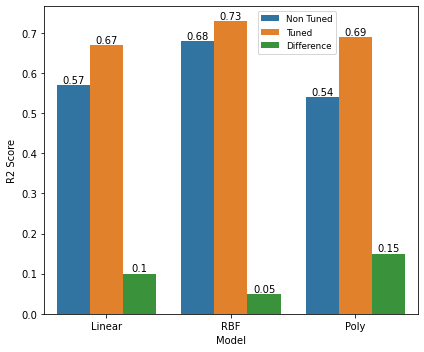

In [140]:
HT_result = pd.DataFrame({'Program': ['Non Tuned', 'Tuned', 'Non Tuned', 'Tuned', 'Non Tuned', 'Tuned', 'Difference', 'Difference', 'Difference'],
                  'Model': ['Linear', 'Linear', 'RBF', 'RBF', 'Poly', 'Poly', 'Linear', 'RBF', 'Poly'],
                  'R2 Score': [scores_linear_.mean(),scores_linear_tuned.mean(),scores_rbf_.mean(),scores_rbf_tuned.mean(), 
                               scores_poly_.mean(),scores_poly_tuned.mean(), score_diff_linear, score_diff_rbf, score_diff_poly ]
                 })

HT_result['R2 Score'] = HT_result['R2 Score'].round(2)

plt.rcParams["figure.figsize"] = [6.00, 5]
plt.rcParams["figure.autolayout"] = True

ax = sns.barplot(data=b, x='Model', y='R2 Score', hue='Program')


ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])

plt.legend(fontsize=8.8, bbox_to_anchor= (0.56,1))
plt.savefig('Analysis Plot Images/HT_result_comparison.png')
plt.show()

In [141]:
HT_result

,Program,Model,R2 Score
0,Non Tuned,Linear,0.57
1,Tuned,Linear,0.67
2,Non Tuned,RBF,0.68
3,Tuned,RBF,0.73
4,Non Tuned,Poly,0.54
5,Tuned,Poly,0.69
6,Difference,Linear,0.10
7,Difference,RBF,0.05
8,Difference,Poly,0.15


### Summary HT

In [145]:
print(best_params_linear)
print(best_params_rbf)
print(best_params_poly)

{'C': 0.1, 'degree': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
{'C': 10, 'degree': 1, 'epsilon': 0.001, 'gamma': 'scale', 'kernel': 'rbf'}
{'C': 10, 'degree': 3, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'poly'}


In [146]:
print(scores_linear_tuned.mean())
print(scores_rbf_tuned.mean())
print(scores_poly_tuned.mean())

0.6690184816138537
0.7278016591371522
0.6906847082926204
